In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradient = (1 / m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= learning_rate * gradient
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

In [2]:
dataset = pd.read_csv('heart disease.csv')

In [3]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
dataset.dropna(inplace=True)

In [7]:
X = dataset.drop(columns=["TenYearCHD"]) 
y = dataset["TenYearCHD"]

In [8]:
X = np.hstack((np.ones((X.shape[0], 1)), X))  
y = y.values.reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

In [24]:
theta = np.zeros((X_train.shape[1], 1))
learning_rate = 0.002
iterations = 1000

In [25]:
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

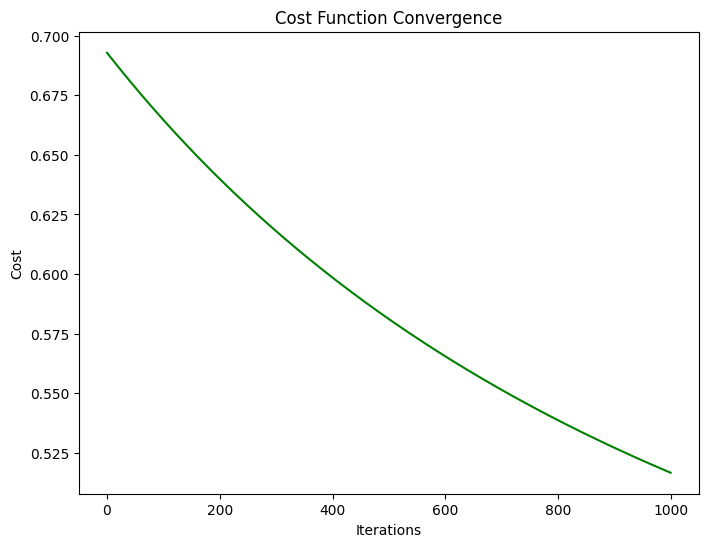

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), np.array(cost_history).flatten(), color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [59]:
predictions = sigmoid(X_test @ theta) >= 0.7

In [60]:
print("Accuracy of the function:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy of the function: 0.8497267759562842
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       620
           1       1.00      0.02      0.04       112

    accuracy                           0.85       732
   macro avg       0.92      0.51      0.48       732
weighted avg       0.87      0.85      0.78       732



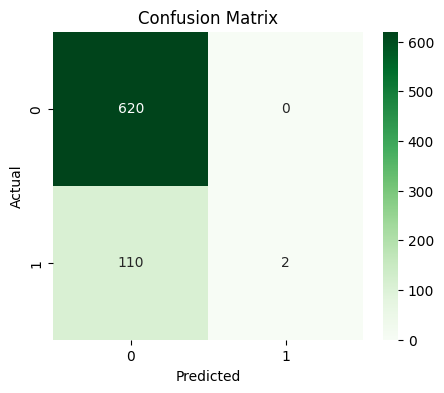

In [61]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

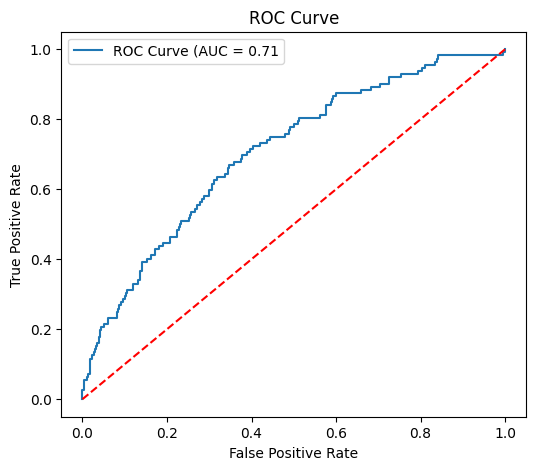

In [62]:
fpr, tpr, _ = roc_curve(y_test, sigmoid(X_test @ theta))
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, sigmoid(X_test @ theta)):.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()